In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [49]:
df = pd.read_csv(r'/Users/bendavid/Desktop/Data/sqf-2019.csv')
df = df.dropna()

In [50]:
data = df[['SUSPECT_REPORTED_AGE', 'SUSPECT_RACE_DESCRIPTION']]
data

,SUSPECT_REPORTED_AGE,SUSPECT_RACE_DESCRIPTION
0,30.0,BLACK
1,22.0,BLACK
2,56.0,WHITE
5,17.0,BLACK
9,17.0,BLACK
...,...,...
13453,56.0,BLACK
13454,27.0,WHITE
13455,40.0,BLACK
13456,55.0,WHITE


In [51]:
# Divide minores and adults into two different groups

def kk(row):
    if row['SUSPECT_REPORTED_AGE'] <= 18:
        return 'Minor'
    else:
        return 'Adult'

In [52]:
data['Age'] = data.apply(kk, axis = 1)

<ipython-input-52-60ae87bc616d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data.apply(kk, axis = 1)


In [53]:
# Form a table of content 

table = pd.crosstab(index=data["Age"], columns=data["SUSPECT_RACE_DESCRIPTION"]) 
del table['(null)']
table

SUSPECT_RACE_DESCRIPTION,AMERICAN INDIAN/ALASKAN N,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
Age,,,,,,
Adult,4,176,4589,686,845,1730
Minor,2,49,1688,198,134,472


In [54]:
table.columns

Index(['AMERICAN INDIAN/ALASKAN N', 'ASIAN / PACIFIC ISLANDER', 'BLACK',
       'BLACK HISPANIC', 'WHITE', 'WHITE HISPANIC'],
      dtype='object', name='SUSPECT_RACE_DESCRIPTION')

In [55]:
# Sum up values  
import numpy as np
total = 0
for races in table.columns:
    total+=np.sum(table[races])
    print(total)

6
231
6508
7392
8371
10573


In [56]:
# Chi-squared test 

from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(table)

print("chi2:", chi2)
print("p", p)
print("dof:", dof)
print("expected:", expected)

chi2: 95.78427675903004
p 4.0831806939716537e-19
dof: 5
expected: [[4.55689019e+00 1.70883382e+02 4.76726662e+03 6.71381822e+02
  7.43532583e+02 1.67237870e+03]
 [1.44310981e+00 5.41166178e+01 1.50973338e+03 2.12618178e+02
  2.35467417e+02 5.29621300e+02]]


In [57]:
# Statistical analysis from chi-squared test from independence indicated
# that there is an association between age and race.
# (p < 0.001).

In [58]:
# Classify suspects by age

adult = df['SUSPECT_REPORTED_AGE'] >= 18
minor = df['SUSPECT_REPORTED_AGE'] < 18

In [59]:
# Classify suspects by race

black = df['SUSPECT_RACE_DESCRIPTION'] == 'BLACK'
white = df['SUSPECT_RACE_DESCRIPTION'] == 'WHITE'

In [60]:
# Classify suspects given their race and age


adult_black = df[adult & black]
minor_black = df[minor & black]

adult_white = df[adult & white]
minor_white = df[minor & white]


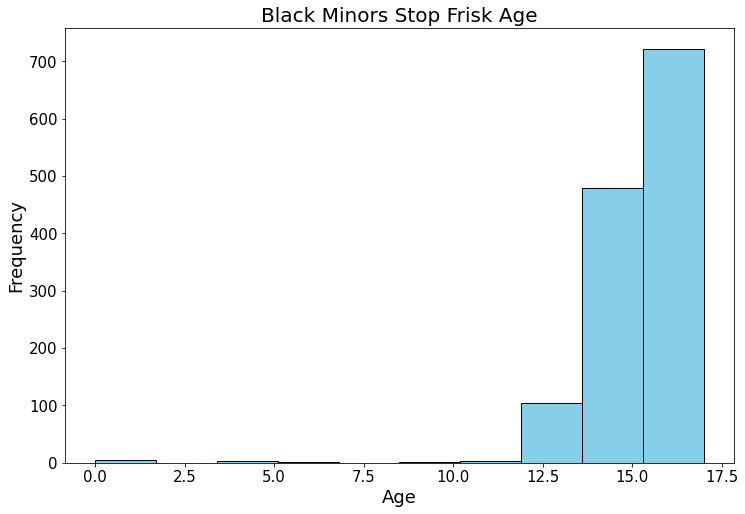

In [61]:
# Plot a ditribution of black minors

fig, axs = plt.subplots(figsize=(12,8))
axs.hist(minor_black['SUSPECT_REPORTED_AGE'], color="SkyBlue", edgecolor="Black")
plt.title("Black Minors Stop Frisk Age", fontsize=20)
axs.set_xlabel("Age", fontsize=18)
axs.set_ylabel("Frequency", fontsize=18)
axs.tick_params(labelsize=15)

#plt.xticks(rotation=90)

plt.show()

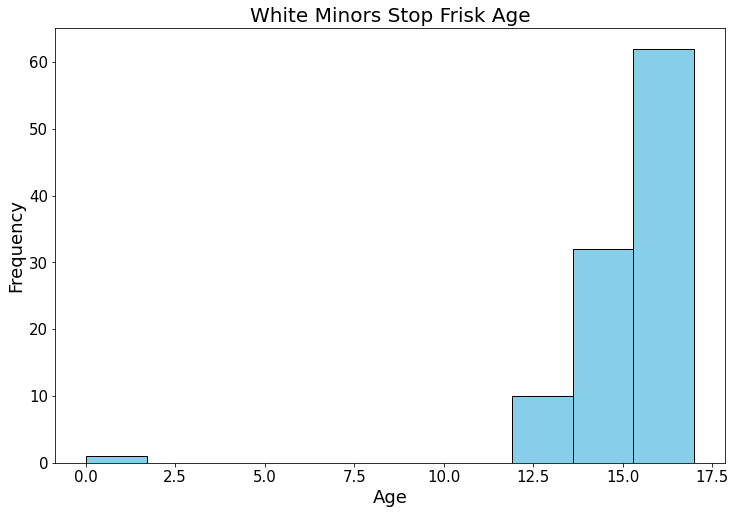

In [62]:
# Plot a ditribution of white minors


fig, axs = plt.subplots(figsize=(12,8))
axs.hist(minor_white['SUSPECT_REPORTED_AGE'], color="SkyBlue", edgecolor="Black")
plt.title("White Minors Stop Frisk Age", fontsize=20)
axs.set_xlabel("Age", fontsize=18)
axs.set_ylabel("Frequency", fontsize=18)
axs.tick_params(labelsize=15)

#plt.xticks(rotation=90)

plt.show()

In [63]:
# Define CI method

def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

In [64]:
# Find the CI mean of black minors 

CI_mean(minor_black['SUSPECT_REPORTED_AGE'])

Average is: 15.395454545454545
95% CI of mean is: (15.302897461992643, 15.488011628916446)


In [65]:
# Find the CI mean of black adults 

CI_mean(adult_black['SUSPECT_REPORTED_AGE'])

Average is: 31.224732701230582
95% CI of mean is: (30.894816189261796, 31.55464921319937)


In [66]:
# Find the CI mean of white minors 

CI_mean(minor_white['SUSPECT_REPORTED_AGE'])

Average is: 15.457142857142857
95% CI of mean is: (15.067345872946097, 15.846939841339617)


In [67]:
# Find the CI mean of white adults 

CI_mean(adult_white['SUSPECT_REPORTED_AGE'])

Average is: 34.08466819221968
95% CI of mean is: (33.27914865781488, 34.89018772662448)


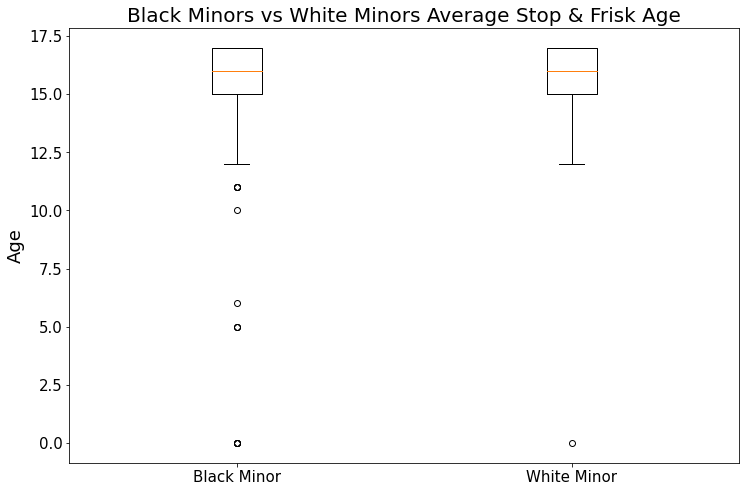

In [68]:
# Plot Boxplot showing the mean difference between black and white minors

fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([minor_black['SUSPECT_REPORTED_AGE'], minor_white['SUSPECT_REPORTED_AGE']])
plt.title('Black Minors vs White Minors Average Stop & Frisk Age', fontsize=20)
axs.set_xticklabels(['Black Minor','White Minor'])
axs.set_ylabel('Age', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [69]:
#Define CI mean difference method 

def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [70]:
# Find CI mean difference between black and white minors
CI_mean_diff(minor_white['SUSPECT_REPORTED_AGE'],minor_black['SUSPECT_REPORTED_AGE'])

The average difference is: 0.06168831168831268
The 95% CI is: (-0.33894681231838536, 0.4623234356950107)


In [71]:
# Fins the percentage of black adults below 30 years old

black_age = adult_black['SUSPECT_REPORTED_AGE'] 
byoungAd = black_age < 30 
byoungAd.value_counts(sum)

True     0.540044
False    0.459956
Name: SUSPECT_REPORTED_AGE, dtype: float64

In [72]:
# Fins the percentage of white adults below 30 years old

white_age = adult_white['SUSPECT_REPORTED_AGE'] 
wyoungAd = white_age < 30 
wyoungAd.value_counts(sum)

False    0.589245
True     0.410755
Name: SUSPECT_REPORTED_AGE, dtype: float64

In [73]:
# Fins the percentage of white adults above 30 years old

whiteAd = white_age > 30 
whiteAd.value_counts(sum)

True     0.529748
False    0.470252
Name: SUSPECT_REPORTED_AGE, dtype: float64

In [74]:
# Average difference between white and black minors isn't significant. 

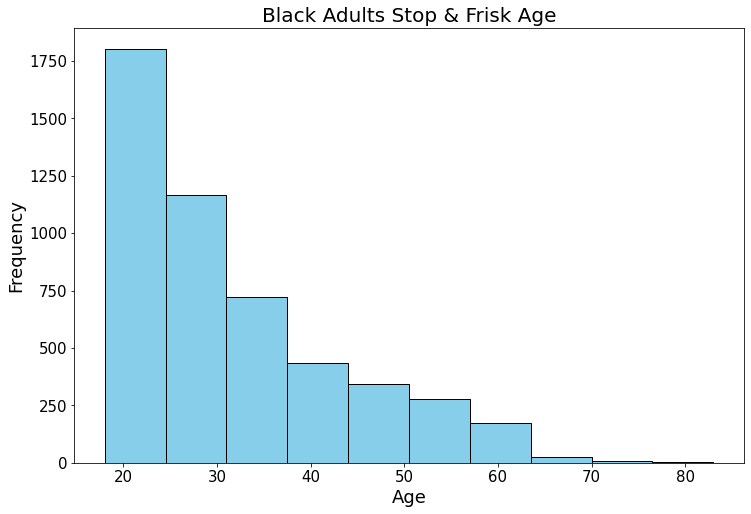

In [88]:
# Plot a ditribution of black adults

fig, axs = plt.subplots(figsize=(12,8))
axs.hist(adult_black['SUSPECT_REPORTED_AGE'], color="SkyBlue", edgecolor="Black")
plt.title("Black Adults Stop & Frisk Age", fontsize=20)
axs.set_xlabel("Age", fontsize=18)
axs.set_ylabel("Frequency", fontsize=18)
axs.tick_params(labelsize=15)

#plt.xticks(rotation=90)

plt.show()

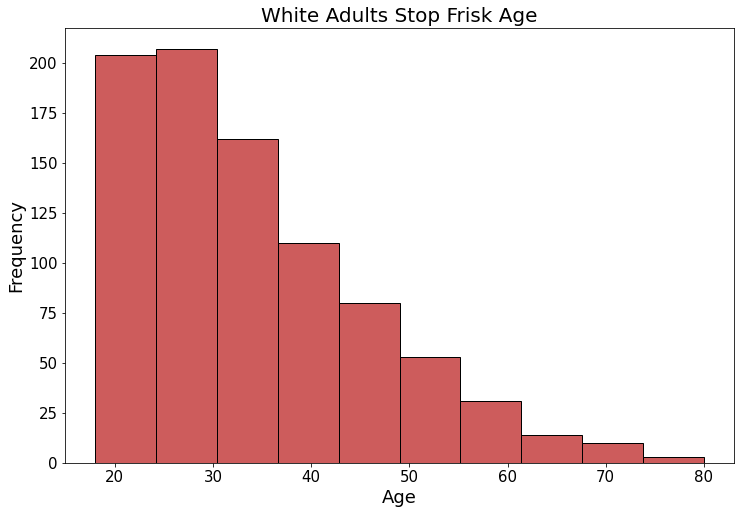

In [89]:
# Plot a ditribution of white adults

fig, axs = plt.subplots(figsize=(12,8))
axs.hist(adult_white['SUSPECT_REPORTED_AGE'], color="indianred", edgecolor="Black")
plt.title("White Adults Stop Frisk Age", fontsize=20)
axs.set_xlabel("Age", fontsize=18)
axs.set_ylabel("Frequency", fontsize=18)
axs.tick_params(labelsize=15)

#plt.xticks(rotation=90)

plt.show()

In [77]:
# Find the CI mean difference for white and black adults

CI_mean_diff(adult_white['SUSPECT_REPORTED_AGE'],adult_black['SUSPECT_REPORTED_AGE'])

The average difference is: 2.8599354909890984
The 95% CI is: (1.9894720367433854, 3.7303989452348114)


In [78]:
# Average difference between white and black adults is more substantial than minors' 
# average difference. 

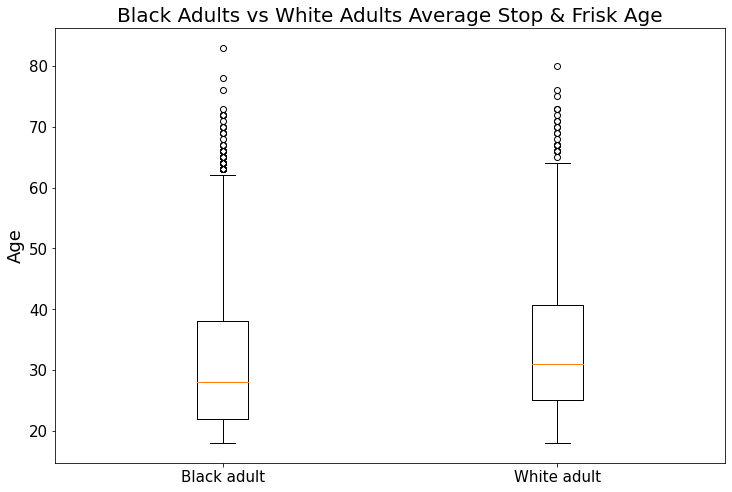

In [79]:
# Plot Boxplot showing the mean difference between black and white adults

fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([adult_black['SUSPECT_REPORTED_AGE'], adult_white['SUSPECT_REPORTED_AGE']])
plt.title('Black Adults vs White Adults Average Stop & Frisk Age', fontsize=20)
axs.set_xticklabels(['Black adult','White adult'])
axs.set_ylabel('Age', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()